# Psychoinformatics - Week 11 (Examples)
by 吳由由 (b06902104@ntu.edu.tw)

In [2]:
import numpy as np
import xgboost
from matplotlib.pyplot import *
%matplotlib inline
from sklearn import *
warnings.simplefilter('ignore', DeprecationWarning)

D:\anaconda3.6\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\anaconda3.6\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
D:\anaconda3.6\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


# 1 執行並觀察以下的機器學習結果 (0分)

## 1.0 IRIS dataset & Ensemble model function

In [3]:
iris = datasets.load_iris()
X=iris.data
Y=iris.target

In [4]:
np.random.seed(0)
sss=model_selection.StratifiedShuffleSplit(n_splits=5,test_size=0.1)
def EnsembleModels(model, Max_n_estimators):
    accs=[] # mean cross-validation accuracies of the models w/ different n_estimators from 1..Max_n_estimators
    for n in range(1,Max_n_estimators+1):  
        print(n,end=' ') # showing progress
        model.n_estimators=n
        acc=[] # cross-validation accuracies of the ensemble model w/ n_estimators=n
        for train_index, test_index in sss.split(X, Y): # 5-fold cross-validation of one ensemble model
            X_train, X_test = X[train_index], X[test_index]
            Y_train, Y_test = Y[train_index], Y[test_index]
            model.fit(X_train[:,0:2],Y_train) #training
            acc.append(model.predict(X_test[:,0:2])==Y_test) 
        accs.append(np.mean(acc)) # aggregating mean cross-validation accuracies across all the ensemble models
    return(accs)

## 1.1 Bagging (Bootstrap Aggregating)

###  <font color="#0984e3"> (a) 1.1.1 Tree max_depth = 1</font>

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

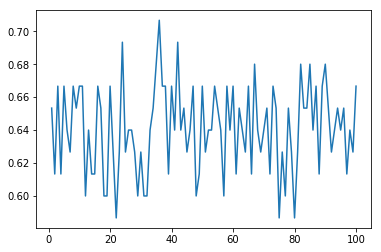

In [5]:
model=ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_depth=1))
plot(range(1,101),EnsembleModels(model,100));

###  <font color="#0984e3">(b) 1.1.2 Tree max_depth = 3</font>

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

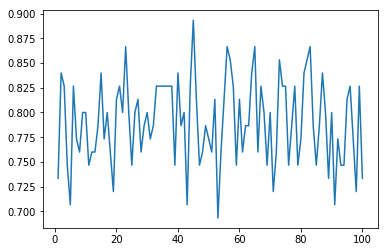

In [6]:
model=ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_depth=3))
plot(range(1,101),EnsembleModels(model,100));

## 1.2 Boosting

### 1.2.1 AdaBoost

#### <font color="#5758BB"> (c) 1.2.1.1 Tree max_depth = 1 </font>

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

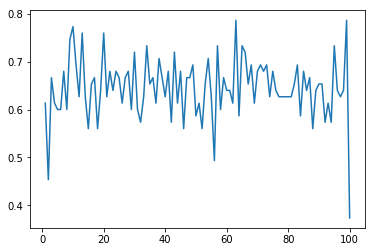

In [7]:
model=ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1))
plot(range(1,101),EnsembleModels(model,100));

#### <font color="#e17055"> (d) 1.2.1.2 Tree max_depth = 3 </font>

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

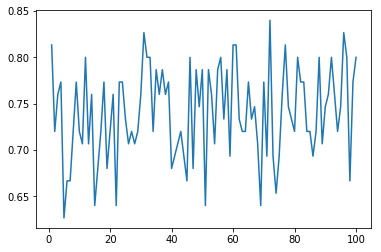

In [9]:
model=ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=3))
plot(range(1,101),EnsembleModels(model,100));

### 1.2.2 Gradient Boosting

The following two implementations are conceptually identical but XGBoost is more resource-efficient and can be parallelized/distributed.

#### 1.2.2.1 Scikit-learn's Gradient Tree Boosting

#####  <font color="#5758BB"> (e) 1.2.2.1.1 Tree max_depth = 1 </font>

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

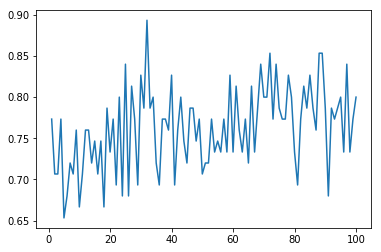

In [9]:
model=ensemble.GradientBoostingClassifier(max_depth=1)
plot(range(1,101),EnsembleModels(model,100));

##### <font color="#e17055">(f) 1.2.2.1.2 Tree max_depth = 3</font>

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

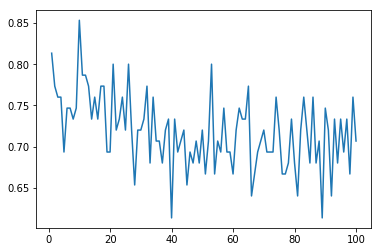

In [10]:
model=ensemble.GradientBoostingClassifier(max_depth=3)
plot(range(1,101),EnsembleModels(model,100));

#### 1.2.2.2 XGBoost (eXtreme Gradient Boosting)

##### <font color="#5758BB"> (g) 1.2.2.2.1 Tree max_depth = 1 </font>

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

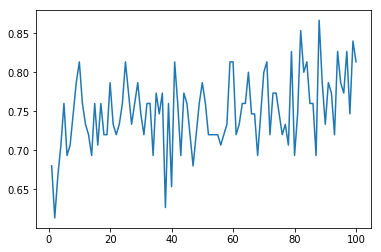

In [11]:
model=xgboost.XGBClassifier(max_depth=1)
plot(range(1,101),EnsembleModels(model,100));

##### <font color="#e17055">(h) 1.2.2.2.2 Tree max_depth = 3</font>

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

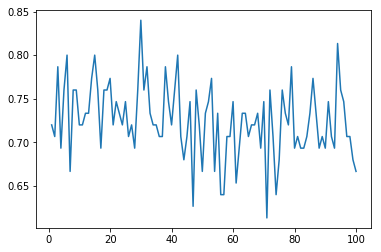

In [12]:
model=xgboost.XGBClassifier(max_depth=3)
plot(range(1,101),EnsembleModels(model,100));

# 2 根據以上的觀察回答以下的問題 (6 分)

## 2.1 在Bagging時, <font color="#0984e3">(b)1.1.2</font> 中複雜模型的正確率是否比  <font color="#0984e3">(a)1.1.1</font> 簡單模型的正確率好或差? 為什麼 (2分)

是，因為1.1.2的max_depth比1.1.1大，模型比較複雜。雖然每一個複雜的 model 獨自拿出來看 variance 都很大，但是把不同的 variance 很大的 model 集合起來投票以後，他的variance 就不會這麼大，且他的 bias 會是小的，所以正確率較好。

## 2.2 在Boosting時,  <font color="#e17055">(d)1.2.1.2/ (f)1.2.2.1.2/ (h)1.2.2.2.2</font>中複雜模型的正確率是否比  <font color="#5758BB">(c)1.2.1.1/ (e) 1.2.2.1.1/ (g)1.2.2.2.1</font>中相對應的簡單模型正確率好或差? 為什麼 (2分)

(d)比(c)好, AdaBoost算法提高被前幾個分類器線性組合的分類錯誤樣本的權重，這樣做可以讓每次訓練新的分類器的時後都聚焦在容易分類錯誤的訓練樣本上。每個分類器使用加權投票機制取代平均投票機制，準確率較大的分類器有較大的權重，準確率低的分類器權重較低。d的max_depth比較大，模型比較複雜，所以會有比較多正確率較高的分類器，準確度高的分類器會得到比較大的權重，所以複雜的模型正確率比較高。

Boosting透過很多個簡單模型來進行機器學習，唯有彼此都是簡單模型，才能好好專注在自己本身的預測、分類，然後再把彼此的成果結合一起，若模型太複雜，則會互相干擾預測、分類的結果。

(f)比(e)差, f 的max_depth比較大，模型較複雜，當複雜度高時，彼此之間就會互相干擾，影響最後預測、分類結果。

(h)比(g)差, h 的max_depth比較大，模型較複雜，當複雜度高時，彼此之間就會互相干擾，影響最後預測、分類結果。

## 2.3 為何只有Boosting在簡單模型時（ <font color="#5758BB"> (c)1.2.1.1/ (e)1.2.2.1.1/ (g)1.2.2.2.1</font> ），正確率大致上會隨著n_estimators數目變多而增加，但Bagging和複雜的Boosting模型卻不是如此? (2分)

Bagging採用的是投票的方式，所以n_estimators的增加不影響此次判斷出來的結果(投票比較多次不會讓判斷比較準確)

Boosting是複雜模型時，若n_estimators又變多，彼此之間就會互相干擾的次數就會更多，影響最後預測、分類結果，所以正確率並不會隨著n_estimators增加而上升，反而互相干擾更多。